In [1]:
import sys,os,pandas,numpy,seaborn

import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40,'font.family':'Arial','xtick.labelsize':20,'ytick.labelsize':20,'axes.labelsize':33})
matplotlib.rcParams['pdf.fonttype']=42

# 0. user defined variables

In [2]:
kallisto_dir='/Volumes/omics4tb2/alomana/projects/TLR/data/ecoli_GSE53767/kallisto.1e3/'

In [3]:
metadata={}
metadata['mRNA']='mRNA'
metadata['footprints']='footprints'

# 1. read files

In [4]:
myList=[]
for sample in metadata.keys():
    print(sample)
    input_file=kallisto_dir+sample+'/abundance.tsv'
    print(input_file)
    df=pandas.read_csv(input_file,sep='\t',index_col=0)
    df.index.name='geneID'
    df.rename(columns={"tpm": "{}".format(metadata[sample])},inplace=True)
    df.drop(columns=['length','eff_length',"est_counts"],inplace=True)
    myList.append(df)
    print(df.head())
    print(df.shape)
    print()

mRNA
/Volumes/omics4tb2/alomana/projects/TLR/data/ecoli_GSE53767/kallisto.1e3/mRNA/abundance.tsv
                 mRNA
geneID               
VIMSS14146    0.00000
VIMSS14147  105.86800
VIMSS14148  100.89800
VIMSS14149   85.54470
VIMSS14150    7.73442
(4611, 1)

footprints
/Volumes/omics4tb2/alomana/projects/TLR/data/ecoli_GSE53767/kallisto.1e3/footprints/abundance.tsv
            footprints
geneID                
VIMSS14146    0.000000
VIMSS14147   30.199400
VIMSS14148   22.693300
VIMSS14149   48.815900
VIMSS14150    0.310194
(4611, 1)



In [5]:
df=pandas.concat(myList,axis=1)
print(df.shape)
df.head()

(4611, 2)


,mRNA,footprints
geneID,,
VIMSS14146,0.00000,0.000000
VIMSS14147,105.86800,30.199400
VIMSS14148,100.89800,22.693300
VIMSS14149,85.54470,48.815900
VIMSS14150,7.73442,0.310194


# 2. analysis

In [6]:
gene_names=df.index.to_list()
print('number of elements:',len(gene_names))

setx=[]; sety=[]
hollowx=[]; hollowy=[]

for gene_name in gene_names:
    
    # data transformation
    log2M=float(numpy.log2(df.loc[gene_name,['mRNA']]+1))
    log10M=float(numpy.log10(df.loc[gene_name,['mRNA']]+1))
    log2F=float(numpy.log2(df.loc[gene_name,['footprints']]+1))
        
    m=log10M
    r=log2F-log2M
    
    if log2M > 1: # exclude genes below TPM=1
        if log2F > 0: # exclude hollow genes
            setx.append(m); sety.append(r)
        else:
            hollowx.append(m); hollowy.append(r)
            
print(len(setx),len(hollowx))

number of elements: 4611
3036 27


# 2.3. regression model

In [7]:
print('number of elements:',len(setx),len(sety))
# perform regression analysis
print('\t regression results:')
slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(setx,sety)
print('\t\t slope',slope)
print('\t\t intercept',intercept)
print('\t\t r_value',r_value)
print('\t\t pvalue',p_value)
print('\t\t std_err',std_err)

# compute for the model
m=slope
c=intercept
expected=list(m*numpy.array(setx)+c)

number of elements: 3036 3036
	 regression results:
		 slope -0.27043267804669485
		 intercept -1.127966199470419
		 r_value -0.16358826267711174
		 pvalue 1.177593738955718e-19
		 std_err 0.029607992748204255


# 3. plot

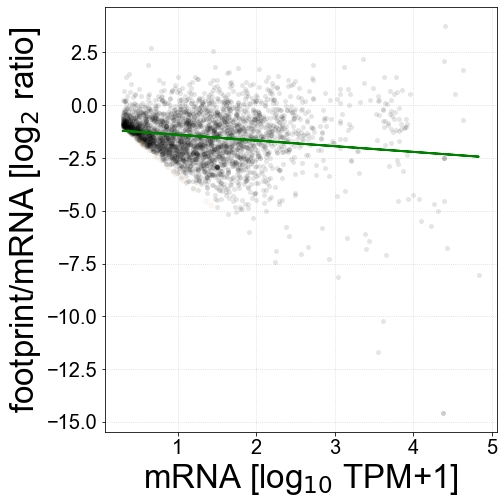

In [8]:
matplotlib.pyplot.figure(None,(8,8))

matplotlib.pyplot.plot(setx,sety,'o',color='black',alpha=0.1,ms=5,mew=0)
matplotlib.pyplot.plot(hollowx,hollowy,'o',alpha=0.1,mew=0,color='tan')

matplotlib.pyplot.xlabel('mRNA [log$_{10}$ TPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')
matplotlib.pyplot.plot(setx,expected,'-',lw=2,color='green')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

# 3.2 plot blocks

4.832978080435798


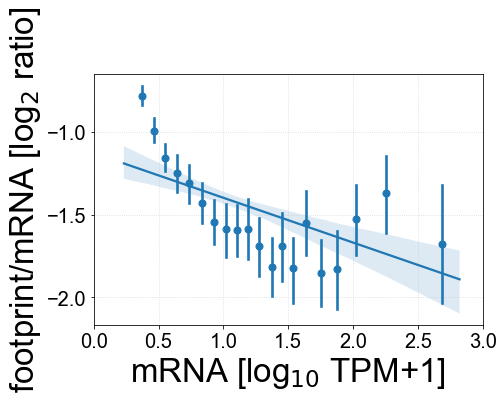

In [9]:
matplotlib.pyplot.figure(None,(8,6))

print(numpy.max(setx))

seaborn.regplot(x=setx,y=sety,x_bins=20)

matplotlib.pyplot.xlim([0,3])
matplotlib.pyplot.xlabel('mRNA [log$_{10}$ TPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

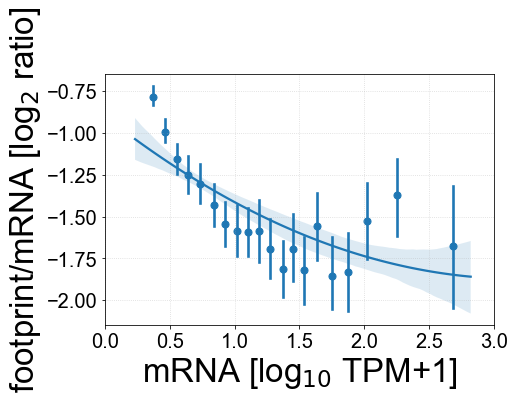

In [10]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20,order=2)

matplotlib.pyplot.xlim([0,3])
matplotlib.pyplot.xlabel('mRNA [log$_{10}$ TPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

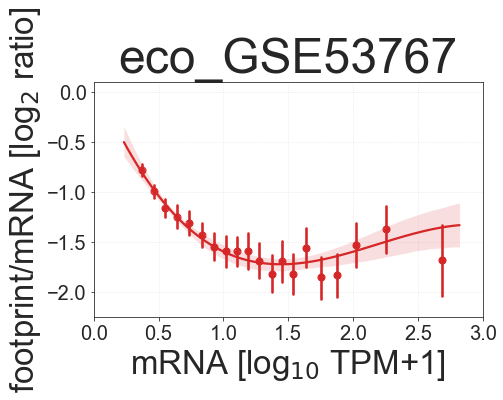

In [13]:
seaborn.set_style("ticks")
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20,order=3,color='tab:red')

matplotlib.pyplot.xlim([0,3])
ub=0.1; lb=-2.25
matplotlib.pyplot.ylim([lb,ub])

matplotlib.pyplot.xlabel('mRNA [log$_{10}$ TPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')
matplotlib.pyplot.title('eco_GSE53767')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

matplotlib.pyplot.savefig('figure.eco_GSE53767.pdf')